## Initial Code Setup

In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the CSV file into Pandas
df = pd.read_csv('data/housing_data_cleaned_transposed.csv', sep=',',skiprows=0, header=0)
df_e = pd.read_csv('data/economicData.csv', sep=',', skiprows=0, header=0)
df.head()

,Date,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA"
0,1979-03-01,47420.325963,52563.259032,73394.779918,60177.913481,62602.241939,41029.156954,56301.519315,65920.046756,48088.397790,48610.808782
1,1979-06-01,48967.092287,54137.586472,77180.816449,61589.446205,65943.236024,41803.486791,59425.806799,66521.644263,49343.646409,50106.680428
2,1979-09-01,50031.142946,55438.816295,80406.587484,61680.095096,68777.723717,42722.358197,60455.320295,69334.112605,49865.193370,51602.552074
3,1979-12-01,50986.193294,56434.819370,83785.158199,62495.935111,71310.255676,43692.851593,61077.318032,70732.826807,52022.099448,53891.536874
4,1980-03-01,51904.910205,58715.987702,86875.107296,62029.740817,73647.977485,45633.838384,63000.506438,72913.617767,53781.215470,56230.718709


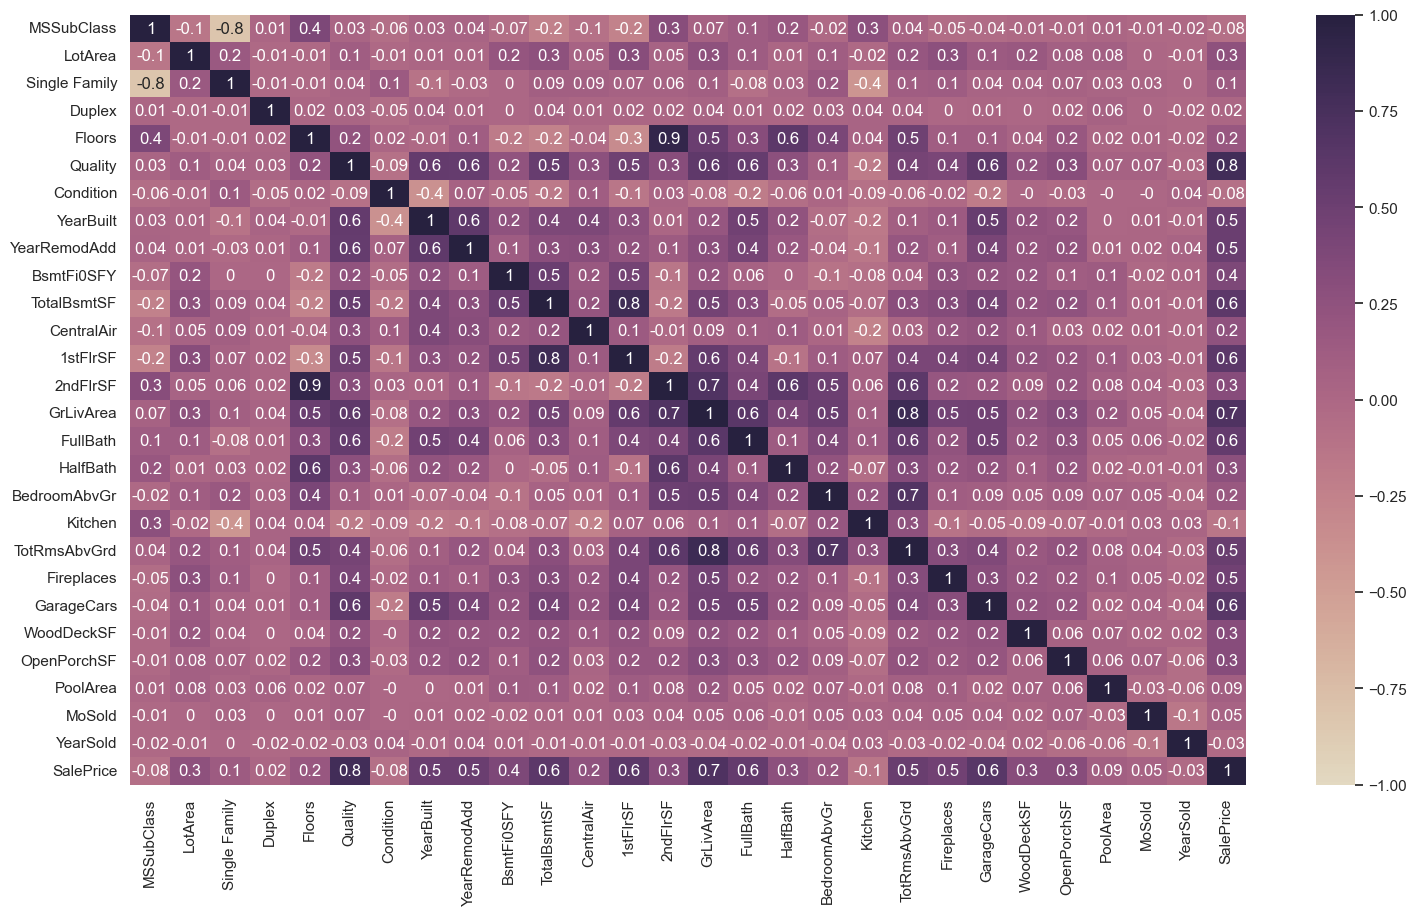

In [9]:
# Correlation Matrix for Physical Housing Data

df_physical = pd.read_csv('data/housing_size_data_cleaned.csv', sep=',', index_col=0, header=0)
sns.set(rc={'figure.figsize':(18,10)})
correlation_matrix = df_physical.corr().round(2)
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(data=correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, fmt='.1g', cmap=colormap)

# Pairplot showing breakdown correlation for each feature.. warning: takes a long time to calculate
#sns.pairplot(df_physical, kind="reg")
plt.show()


In [54]:
# Join datasets to run correlation matrix

df = pd.read_csv('data/housing_data_cleaned_transposed.csv', sep=',',skiprows=0, header=0)
df_e = pd.read_csv('data/economicData.csv', sep=',', skiprows=0, header=0)

df_e = df_e.join(df['United States']) 
df_e.rename(columns={'United States': 'Prices'}, inplace=True)

# Convert date string to datetime format to use in correlation matrix
df_e['Date'] = pd.to_datetime(df_e['Date'], format='%Y-%m-%d')
df_e['Date'] = pd.to_numeric(df_e['Date'])

df_e.head()

,Date,M2MS,FedFundsRate,CPI,Eggs,Lumber,Prices
0,289094400000000000,1387.8,10.088710,9.689852,0.821667,106.300000,47420.325963
1,297043200000000000,1423.0,10.291667,10.284820,0.821667,109.433333,48967.092287
2,304992000000000000,1454.1,11.428333,11.002541,0.821667,105.400000,50031.142946
3,312854400000000000,1473.7,13.778710,12.761858,0.821667,103.633333,50986.193294
4,320716800000000000,1499.8,17.192258,14.361386,0.755000,99.400000,51904.910205


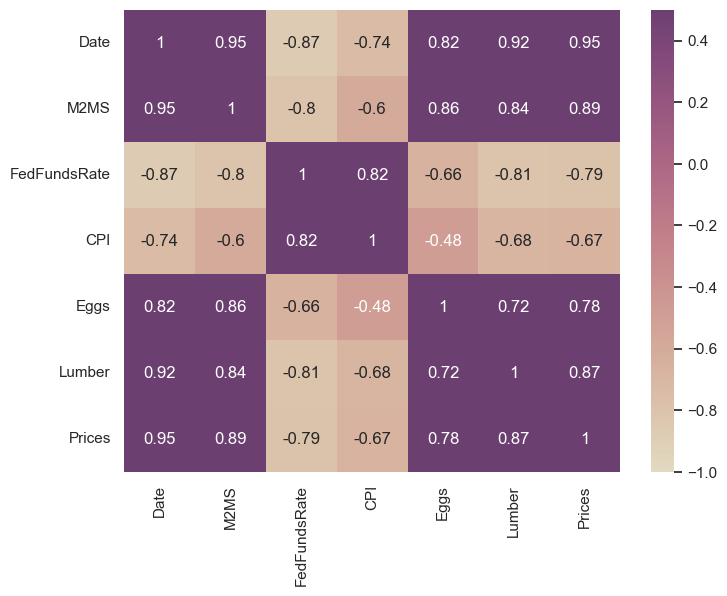

In [55]:
vars = ['Date','M2MS', 'FedFundsRate', 'CPI', 'Eggs', 'Lumber', 'Prices']
corr = df_e.corr().round(2)        
sns.set(rc={'figure.figsize':(8,6)})
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.heatmap(corr.loc[vars,vars], annot=True, cmap=colormap, vmax=.5, vmin=-1, center=0)
plt.show()

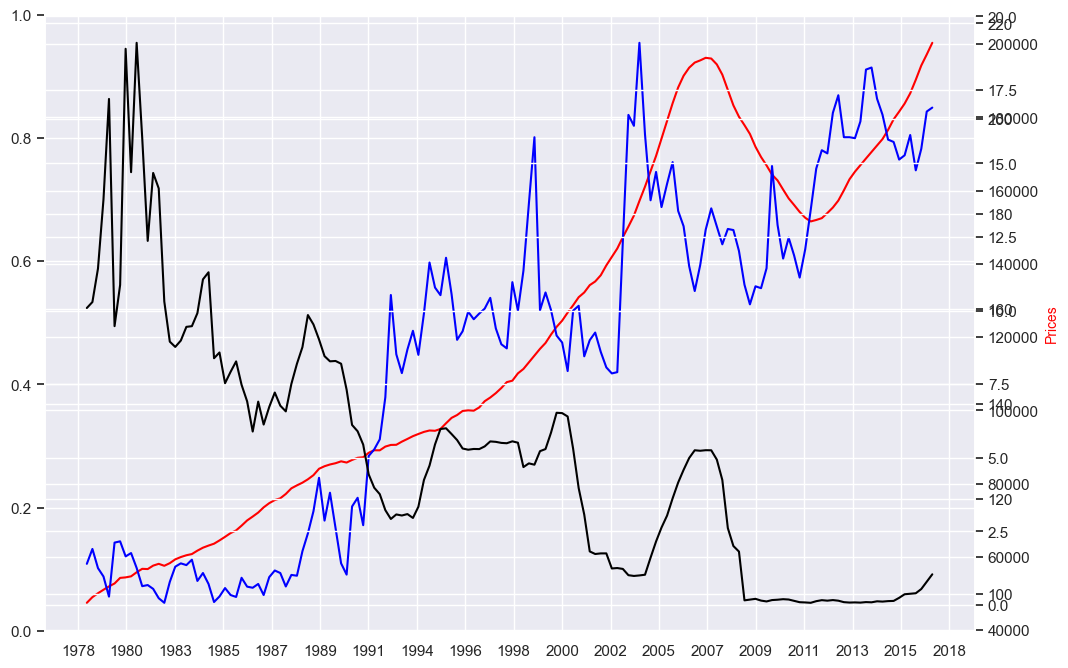

In [18]:
# Plot each row of the data as a separate line to previz and see if there is any correlation
#df_e = pd.read_csv('data/economicData.csv', sep=',', skiprows=0, header=0)
#df_e = df_e.join(df['United States']) 
#df_e.rename(columns={'United States': 'Prices'}, inplace=True)

#define colors to use
col1 = 'green'
col2 = 'red'
col3 = 'blue'
col4 = 'black'

#define the subplots
colormap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

fig,ax = plt.subplots(figsize=(12, 8))
ax.xaxis.set_major_locator(plt.MaxNLocator(22))


# add first dataset to plot
#ax.plot(df_e.Date, df_e.CPI, color=col1)
#ax.set_xlabel('Date', fontsize=14)
#ax.set_ylabel('CPI', color=col1, fontsize=16)

# add second dataset to plot, along secondary y-axis
ax2 = ax.twinx()
ax2.plot(df_e.Date, df_e.Prices, color=col2)
ax2.set_ylabel('Prices', color=col2, fontsize=10)

# add third dataset (to secondary y-axis)
ax3 = ax.twinx()
ax3.plot(df_e.Date, df_e.Lumber, color=col3)
# ax3.set_ylabel('M2', color=col3, fontsize=10)

# add fourth dataset (to secondary y-axis)
ax4 = ax.twinx()
ax4.plot(df_e.Date, df_e.FedFundsRate, color=col4)
#ax4.set_ylabel('FedRate', color=col4, fontsize=10)


In [56]:
from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [67]:
X = df_e[['M2MS', 'FedFundsRate', 'Eggs', 'Lumber']]
y = df_e['Prices']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_val)
metrics.mean_absolute_error(y_val, y_pred)


2265.195373430707

In [38]:
def helloWorld():
    print('hello world')
    
print('first run')
helloWorld()

first run
hello world
